# KNN Classification


import pandas as pd

## Prepare X and y

In [36]:
train_path = "../../data/loan-10k-preprocessed-train.csv"
test_path  = "../../data/loan-10k-preprocessed-test.csv"
sol_path   = "../../data/loan-10k-preprocessed-sol.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)
sol_df   = pd.read_csv(sol_path)  

In [38]:
target_col = "grade"
id_col = "ID"

X_train = train_df.drop(columns=[target_col, id_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[id_col])

## Training and Evaluating based on KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Hold-Out split (80/20) from training set
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

results = []

k_values = [1, 3, 5, 7, 9, 11, 15, 21, 31]

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Fit
    model.fit(X_tr, y_tr)
    
    # Hold-out predictions
    val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    
    # Cross-Val accuracy
    cv_acc = cross_val_score(model, X_train, y_train, cv=5).mean()

    results.append({
        "k": k,
        "holdout_acc": val_acc,
        "cv_acc": cv_acc
    })

res_df = pd.DataFrame(results)
print(res_df)

    k  holdout_acc  cv_acc
0   1       0.3985  0.3982
1   3       0.3890  0.3911
2   5       0.4095  0.4270
3   7       0.4140  0.4325
4   9       0.4190  0.4369
5  11       0.4255  0.4437
6  15       0.4310  0.4502
7  21       0.4465  0.4594
8  31       0.4600  0.4614


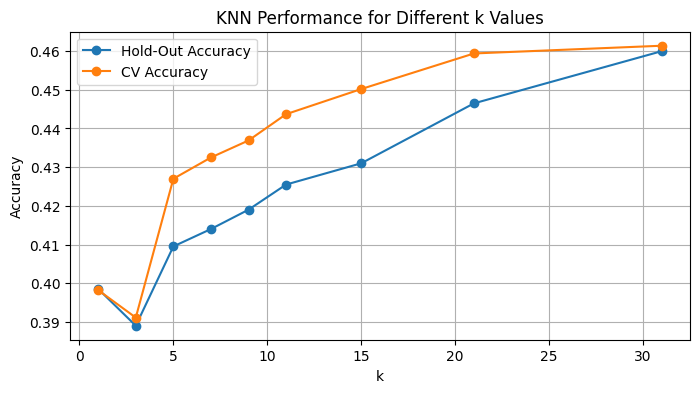

In [40]:
plt.figure(figsize=(8,4))
plt.plot(res_df["k"], res_df["holdout_acc"], marker="o", label="Hold-Out Accuracy")
plt.plot(res_df["k"], res_df["cv_acc"], marker="o", label="CV Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Performance for Different k Values")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
best_k = res_df.sort_values("cv_acc", ascending=False).iloc[0]["k"]
model_best = KNeighborsClassifier(n_neighbors=int(best_k))
model_best.fit(X_train, y_train)

y_pred = model_best.predict(X_train)

print("Classification Report:")
print(classification_report(y_train, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66      1821
           1       0.52      0.62      0.57      2881
           2       0.47      0.66      0.55      2989
           3       0.43      0.16      0.24      1449
           4       0.50      0.03      0.05       621
           5       0.50      0.01      0.01       182
           6       0.00      0.00      0.00        57

    accuracy                           0.52     10000
   macro avg       0.44      0.30      0.30     10000
weighted avg       0.52      0.52      0.49     10000



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

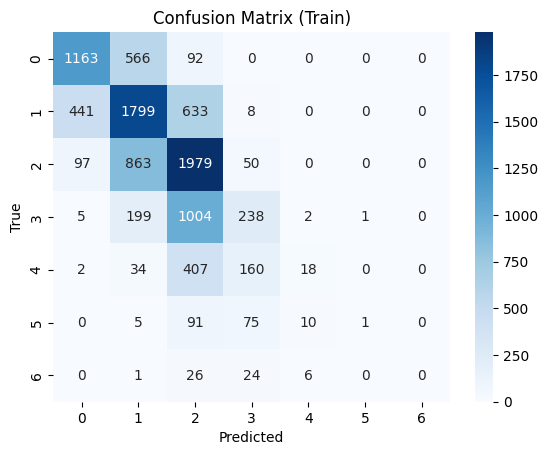

In [42]:
import seaborn as sns

cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Train)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()